# ANALISI DATASET:

### Importazione delle librerie

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Importazione del dataset

In [2]:
def importa_dati(path, sep=','):
    """Funzione per l'importazione di un dataset con un formato csv in un DataFrame di Pandas.
       - path: percorso in cui è salvato il file.csv (stringa);
       - sep: separatore utilizzato nel file (stringa)"""
    data = pd.read_csv(path, sep=sep)
    data.drop('setting_terapia', axis=1, inplace=True)
    data.drop('linea_terapia', axis=1, inplace=True)
    data.drop('raggruppamento terapia', axis=1, inplace=True)
    data.drop('time_point_inizio_terapia', axis=1, inplace=True)
    data.drop('somm1_timepoint', axis=1, inplace=True)
    return data

In [3]:
df = importa_dati('/Users/eliaceccolini/Documents/Uni/Tesi/Dataset_finale/Datasets/BMI_Tirocinio.csv', sep=';')
#df.head()

***
### Definizione delle funzioni

Funzione per evidenziare la distribuzione dell'età

In [4]:
def distribuzione_eta(data):
    """Funzione per evidenziare la distribuzione dell'età dei vari pazienti.
       - data: dataset (DataFrame)"""
    n_a = len([paz for paz in data['classe_eta'] if paz == 'A. <40']) # a (<40)
    n_b = len([paz for paz in data['classe_eta'] if paz == 'C. 40-49']) # b (40-49)
    n_c = len([paz for paz in data['classe_eta'] if paz == 'D.50-59']) # c (50-59)
    n_d = len([paz for paz in data['classe_eta'] if paz == 'E.60-69']) # d (60-69) 
    n_e = len([paz for paz in data['classe_eta'] if paz == 'F.70-79']) # e (70-79)
    n_f = len([paz for paz in data['classe_eta'] if paz == 'E.>79']) # f (>79)
    y = np.array([n_a, n_b, n_c, n_d, n_e, n_f]).flatten()
    labels = ['A: <40', 'B: 40-49', 'C: 50-59', 'D: 60-69', 'E: 70-79', 'F: >79']
    plt.title('classe età')
    plt.pie(y, labels=labels, autopct=lambda pct: func(pct, y))
    plt.savefig('immagini/distr_classe_eta.png', dpi=300)
    
def func(pct, allvalues):
    """Funzione per etichettare le varie porzioni del diagramma a torta"""
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct)

Funzione per evidenziare la distribuzione del sesso 

In [5]:
def distribuzione_sesso(data):
    """Funzione per evidenziare la distribuzione del sesso tra i vari pazienti:
       - data: dataset (DataFrame)"""
    n_uomini = len([paz for paz in data['sesso'] if paz == 'M']) # uomo
    n_donne = len([paz for paz in data['sesso'] if paz == 'F']) # donna
    y = np.array([n_uomini, n_donne]).flatten()
    labels = ['Uomini', 'Donne']
    plt.title('sesso')
    plt.pie(y, labels=labels, autopct=lambda pct: func(pct, y))
    plt.savefig('immagini/distr_sesso.png', dpi=300)

Funzione per evidenziare la distribuzione di chi fa uso o meno di alcol

In [6]:
def distribuzione_alcol(data):
    """Funzione per evidenziare la distribuzione di chi fa uso o meno di alcol:
       - data: dataset (DataFrame)"""
    n_consumatori = len([paz for paz in data['consumatore_alcool'] if paz == 'Sì']) # consumatori
    n_non_consumatori = len([paz for paz in data['consumatore_alcool'] if paz == 'No']) # non consumatori
    n_assenti = len([paz for paz in data['consumatore_alcool'] if paz is np.nan]) # sconosciuto
    y = np.array([n_consumatori, n_non_consumatori, n_assenti]).flatten()
    labels = ['Consumatori', 'Non consumatori', 'Sconosciuti']
    plt.title('consumatori alcol')
    plt.pie(y, labels=labels, autopct=lambda pct: func(pct, y))
    plt.savefig('immagini/distr_alcol.png', dpi=300)

Funzione per evidenziare la distribuzione dei fumatori

In [7]:
def distribuzione_fumatori(data):
    """Funzione per evidenziare la distribuzione dei fumatori e non fumatori"""
    n_fumatori = len([paz for paz in data['fumatore'] if paz == 'Sì']) # fumatore
    n_non_fumatori = len([paz for paz in data['fumatore'] if paz == 'No']) # non fumatore
    n_assenti = len([paz for paz in data['fumatore'] if paz is np.nan]) # sconosciuto
    y = np.array([n_fumatori, n_non_fumatori, n_assenti]).flatten()
    labels = ['Fumatori', 'Non fumatori', 'Sconosciuti']
    plt.title('fumatori')
    plt.pie(y, labels=labels, autopct=lambda pct: func(pct, y))
    plt.savefig('immagini/distr_fumatori.png', dpi=300)

Funzione per evidenziare la distribuzione del gruppo della patologia

In [8]:
def distribuzione_gruppo(data):
    """Funzione per evidenziare la distribuzione del gruppo della patologia del tumore del paziente.
       - data: dataset(DataFrame)"""
    n_g1 = len([paz for paz in data['gruppo_patologia'] if paz == 'G1']) # G1
    n_g2 = len([paz for paz in data['gruppo_patologia'] if paz == 'G2']) # G2
    n_g3 = len([paz for paz in data['gruppo_patologia'] if paz == 'G3']) # G3
    n_g4 = len([paz for paz in data['gruppo_patologia'] if paz == 'G4']) # G4
    n_g5 = len([paz for paz in data['gruppo_patologia'] if paz == 'G5']) # G5
    n_g6 = len([paz for paz in data['gruppo_patologia'] if paz == 'G6']) # G6
    y = np.array([n_g1, n_g2, n_g3, n_g4, n_g5, n_g6]).flatten()
    labels = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6']
    plt.title('gruppo patologia')
    plt.pie(y, labels=labels, autopct=lambda pct: func(pct, y))
    plt.savefig('immagini/distr_gruppo.png', dpi=300)

Funzione per evidenziare la distribuzione della patologia

In [9]:
def distribuzione_patologia(data):
    """Funzione per evidenziare la distribuzione della patologia del tumore del paziente.
       - data: dataframe (DataFrame)"""
    # creazione nuovo dataset per costruire un istogramma
    values = np.zeros(37, dtype=int)
    new_data = pd.DataFrame(values)
    new_data.index = data['Patologia'].unique()
    new_data.columns = ['Numero pazienti']
    for pat in new_data.index:
        new_data.loc[pat] = len([p for p in data['Patologia'] if p == pat])
        
    # plot del grafico
    new_data.plot.bar(rot=90)
    plt.title('patologia')
    plt.xlabel('Patologia')
    plt.ylabel('Numero di pazienti')
    plt.savefig('immagini/distr_patologia.png', dpi=300)
    plt.show()

Funzione per evidenziare la distribuzione dei principi attivi della linea terapeutica

In [10]:
def distribuzione_principi_attivi(data):
    """Funzione per evidenziare la distribuzione dei principi attivi utilizzati nella linea terapeutica.
       - data: dataset (DataFrame)"""
    n_1 = len([p for p in df['classi_principi_attivi'] if p == 'L01']) # L01
    n_12 = len([p for p in df['classi_principi_attivi'] if p == 'L01,L02']) # L01, L02
    n_2 = len([p for p in df['classi_principi_attivi'] if p == 'L02']) # L02
    n_14 = len([p for p in df['classi_principi_attivi'] if p == 'L01,L04']) # L01, L04
    y = np.array([n_1, n_12, n_2, n_14]).flatten()
    labels = ['L01', 'L01, L02', 'L02', 'L01, L04']
    plt.title('prinicipi_attivi')
    plt.pie(y, labels=labels, autopct=lambda pct: func(pct, y))
    plt.savefig('immagini/distr_principi_attivi.png', dpi=300)

Funzione per evidenziare la distribuzione della miglior risposta

In [11]:
def distribuzione_best_response(data):
    """Funzione per evidenziare la distribuzione della miglior risposta.
       - data: dataset (DataFrame)"""
    n1 = len([p for p in data['best_response'] if p == 1]) # 1
    n2 = len([p for p in data['best_response'] if p == 2]) # 2
    n3 = len([p for p in data['best_response'] if p == 3]) # 3
    n4 = len([p for p in data['best_response'] if p == 4]) # 4
    n6 = len([p for p in data['best_response'] if p == 6]) # 6
    y = np.array([n1, n2, n3, n4, n6]).flatten()
    labels = ['1', '2', '3', '4', '6']
    plt.title('miglior risposta')
    plt.pie(y, labels=labels, autopct=lambda pct: func(pct, y))
    plt.savefig('immagini/distr_best_response.png', dpi=300)

Funzione per evidenziare la distribuzione della peggior risposta

In [12]:
def distribuzione_worst_response(data):
    """Funzione per evidenziare la distribuzione della miglior risposta.
       - data: dataset (DataFrame)"""
    n1 = len([p for p in data['worst_response'] if p == 1]) # 1
    n2 = len([p for p in data['worst_response'] if p == 2]) # 2
    n3 = len([p for p in data['worst_response'] if p == 3]) # 3
    n4 = len([p for p in data['worst_response'] if p == 4]) # 4
    n6 = len([p for p in data['worst_response'] if p == 6]) # 6
    y = np.array([n1, n2, n3, n4, n6]).flatten()
    labels = ['1', '2', '3', '4', '6']
    plt.title('peggior risposta')
    plt.pie(y, labels=labels, autopct=lambda pct: func(pct, y))
    plt.savefig('immagini/distr_worst_response.png', dpi=300)

Funzione per evidenziare la distribuzione della grandezza del tumore prima della linea terapeutica

In [13]:
def distribuzione_t(data):
    """Funzione per eviedenziare la distribuzione della grandezza del tumore prima dell'inizio della linea terapeutica.
       - data: dataset (DataFrame)"""
    data['t'] = [str(t) for t in data['t']]
    # Consideriamo solamente i primi due caratteri
    for i in range(data.shape[0]):
        if data.iloc[(i, 4)].startswith('T0'):
            data.iloc[(i, 4)] = 'T0'
        elif data.iloc[(i, 4)].startswith('T1'):
            data.iloc[(i, 4)] = 'T1'
        elif data.iloc[(i, 4)].startswith('T2'):
            data.iloc[(i, 4)] = 'T2'
        elif data.iloc[(i, 4)].startswith('T3'):
            data.iloc[(i, 4)] = 'T3'
        elif data.iloc[(i, 4)].startswith('T4'):
            data.iloc[(i, 4)] = 'T4'
        elif data.iloc[(i, 4)].startswith('Non'):
            data.iloc[(i, 4)] = 'TX'
        else:
            data.iloc[(i, 4)] = 'TX'
    nTX = len([p for p in data['t'] if p == 'TX'])
    nT0 = len([p for p in data['t'] if p == 'T0'])
    nT1 = len([p for p in data['t'] if p == 'T1'])
    nT2 = len([p for p in data['t'] if p == 'T2'])
    nT3 = len([p for p in data['t'] if p == 'T3'])
    nT4 = len([p for p in data['t'] if p == 'T4'])
    y = np.array([nTX, nT0, nT1, nT2, nT3, nT4]).flatten()
    labels = ['Sconosciuto', 'T0', 'T1', 'T2', 'T3', 'T4']
    plt.title('dimensione tumore')
    plt.pie(y, labels=labels, autopct=lambda pct: func(pct, y))
    plt.savefig('immagini/distr_t.png', dpi=300)

Funzione per evidenziare la distribuzione del coinvolgimento dei linfonodi

In [14]:
def distribuzione_n(data):
    """Funzione per eviedenziare la distribuzione del coinvolgimento dei linfonodi
       - data: dataset (DataFrame)"""
    data['n'] = [str(n) for n in data['n']]
    # Consideriamo solamente i primi due caratteri
    for i in range(data.shape[0]):
        if data.iloc[(i, 5)].startswith('N0'):
            data.iloc[(i, 5)] = 'N0'
        elif data.iloc[(i, 5)].startswith('N1'):
            data.iloc[(i, 5)] = 'N1'
        elif data.iloc[(i, 5)].startswith('N2'):
            data.iloc[(i, 5)] = 'N2'
        elif data.iloc[(i, 5)].startswith('N3'):
            data.iloc[(i, 5)] = 'N3'
        elif data.iloc[(i, 5)].startswith('Non'):
            data.iloc[(i, 5)] = 'NX'
        else:
            data.iloc[(i, 5)] = 'NX'
    nNX = len([p for p in data['n'] if p == 'NX'])
    nN0 = len([p for p in data['n'] if p == 'N0'])
    nN1 = len([p for p in data['n'] if p == 'N1'])
    nN2 = len([p for p in data['n'] if p == 'N2'])
    nN3 = len([p for p in data['n'] if p == 'N3'])
    y = np.array([nNX, nN0, nN1, nN2, nN3]).flatten()
    labels = ['Sconosciuto', 'N0', 'N1', 'N2', 'N3']
    plt.title('linfonodi')
    plt.pie(y, labels=labels, autopct=lambda pct: func(pct, y))
    plt.savefig('immagini/distr_n.png', dpi=300)

Funzione per evidenziare la presenza di metastasi

In [15]:
def distribuzione_m(data):
    """Funzione per evidenziare la presenza di una metastasi.
       - data: dataset (DataFrame)"""
    data['m'] = [str(m) for m in data['m']]
    # Consideriamo solamente i primi due caratteri
    for i in range(data.shape[0]):
        if data.iloc[(i, 6)].startswith('M0'):
            data.iloc[(i, 6)] = 'M0'
        elif data.iloc[(i, 6)].startswith('M1'):
            data.iloc[(i, 6)] = 'M1'
        elif data.iloc[(i, 6)].startswith('M2'):
            data.iloc[(i, 6)] = 'M2'
        elif data.iloc[(i, 6)].startswith('Non'):
            data.iloc[(i, 6)] = 'MX'
        else:
            data.iloc[(i, 6)] = 'MX'
    nMX = len([p for p in data['m'] if p == 'MX'])
    nM0 = len([p for p in data['m'] if p == 'M0'])
    nM1 = len([p for p in data['m'] if p == 'M1'])
    nM2 = len([p for p in data['m'] if p == 'M2'])
    y = np.array([nMX, nM0, nM1, nM2]).flatten()
    labels = ['Sconosciuto', 'M0', 'M1', 'M2']
    plt.title('metastasi')
    plt.pie(y, labels=labels, autopct=lambda pct: func(pct, y))
    plt.savefig('immagini/distr_m.png', dpi=300)

Funzione per evidenziare la distribuzione dei sintomi dovuti alla terapia

In [16]:
def distribuzione_sintomo(data, name):
    """Funzione per evidenziare la distribuzione dei sintomi dovuti alla terapia a cui è sottoposto il paziente.
       - data: dataset (DataFrame)
       - name: nome del sintomo di riferimento (string)"""
    cols = ['somm'+str(i)+'_'+name for i in range(1, 7)]
    # casting di tutti i valori in stringhe
    for col in cols:
        data[col].fillna('Grado 0')
        data[col] = [str(s) for s in data[col]]
        
    # creazione nuovo dataset per costruire un istogramma
    values = np.zeros(24, int).reshape(6, 4)
    new_df = pd.DataFrame(values)
    new_df.index = ['somm_' + str(i) for i in range(1, 7)]
    new_df.columns = ['Grado 0', 'Grado 1', 'Grado 2', 'Grado 3']
    i = 0
    for col in cols:
        n_gr0 = len([p for p in data[col] if p == 'Grado 0'])
        n_gr1 = len([p for p in data[col] if p == 'Grado 1'])
        n_gr2 = len([p for p in data[col] if p == 'Grado 2'])
        n_gr3 = len([p for p in data[col] if p == 'Grado 3'])
        values = np.array([n_gr0, n_gr1, n_gr2, n_gr3])
        new_df.iloc[i] = values
        i = i + 1
        
    # plot del grafico
    new_df.plot.bar(rot=0)
    plt.xlabel('Somministrazione')
    plt.ylabel('Numero di pazienti')
    plt.savefig('immagini/distr_'+str(name)+'.png', dpi=300)
    plt.show()

In [17]:
def distribuzione_sintomo_perc(data, name):
    """Funzione per evidenziare la distribuzione in termini percentuali dei sintomi dovuti alla terapia a
       cui è sottoposto il paziente.
       - data: dataset (DataFrame)
       - name: nome del sintomo di riferimento (string)"""
    cols = ['somm'+str(i)+'_'+name for i in range(1, 7)]
    data[cols] = data[cols].fillna(value='Grado 0')
    # casting di tutti i valori in stringhe
    for col in cols:
        data[col] = [str(s) for s in data[col]]
    
    # creazione nuovo dataset per costruire un istogramma
    values = np.zeros(24, int).reshape(6, 4)
    new_df = pd.DataFrame(values)
    new_df.index = ['somm_' + str(i) for i in range(1, 7)]
    new_df.columns = ['Grado 0', 'Grado 1', 'Grado 2', 'Grado 3']
    i = 0
    for col in cols:
        n_gr0 = len([p for p in data[col] if p == 'Grado 0'])
        n_gr1 = len([p for p in data[col] if p == 'Grado 1'])
        n_gr2 = len([p for p in data[col] if p == 'Grado 2'])
        n_gr3 = len([p for p in data[col] if p == 'Grado 3'])
        values = np.array([n_gr0, n_gr1, n_gr2, n_gr3])
        new_df.iloc[i] = values
        i = i + 1
    for j in range(6):
        new_df.iloc[j] = new_df.iloc[j]*100/472
        
    # plot del grafico
    new_df.plot.bar(rot=0)
    plt.title(str(name))
    plt.xlabel('Somministrazione')
    plt.ylabel('% pazienti')
    plt.savefig('immagini/distr_'+str(name)+'.png', dpi=300)
    plt.show()

Funzione per evidenziare la distribuzione dei valori rilevati nelle varie somministrazioni

In [18]:
def distribuzione_valori(data, name):
    """Funzione per evidenziare la distribuzione dei vari valori delle analisi nelle varie somministrazioni
       (creatinina, creatinina2, gluscosio, emoglobina).
       - data: dataset (DataFrame)
       - name: nome del valore misurato(string)"""
    cols = ['somm'+str(i)+'_'+name for i in range(1, 7)]
    
    # sostituzione valori con sotto/in/sopra-range
    for col in cols:
        data[col] = [str(n).replace(",", ".") for n in data[col]]
        for i in range(data.shape[0]):
            if data.loc[(i, col)] != str(np.nan):
                l = data.loc[(i, col)].split(' ')
                try:
                    val = float(l[0])
                    minR = float(l[2].replace('(', ''))
                    maxR = float(l[4].replace(')', ''))
                except ValueError:
                    val = np.nan
                if val < minR:
                    data.loc[(i, col)] = 'underRange'
                elif val > maxR:
                    data.loc[(i, col)] = 'aboveRange'
                else:
                    data.loc[(i, col)] = 'inRange'
        
    # creazione nuovo dataset per costruire un istogramma
    values = np.zeros(24, int).reshape(6, 4)
    new_df = pd.DataFrame(values)
    new_df.index = ['somm_' + str(i) for i in range(1, 7)]
    new_df.columns = ['Sconosciuto', 'In Range', 'Sopra il range', 'Sotto il range']
    i = 0
    for col in cols:
        n_inR = len([p for p in data[col] if p == 'inRange'])
        n_abR = len([p for p in data[col] if p == 'aboveRange'])
        n_unR = len([p for p in data[col] if p == 'underRange'])
        n_sco = len([p for p in data[col] if p == str(np.nan)])
        values = np.array([n_sco, n_inR, n_abR, n_unR])
        new_df.iloc[i] = values
        i = i + 1
    for j in range(6):
        new_df.iloc[j] = new_df.iloc[j]*100/472
        
    # plot del grafico
    new_df.plot.bar(rot=0)
    plt.title(str(name))
    plt.xlabel('Somministrazione')
    plt.ylabel('% pazienti')
    plt.savefig('immagini/distr_'+str(name)+'.png', dpi=300)
    plt.show()

***
### Distribuzioni delle variabili del dataset

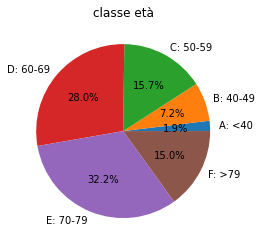

In [19]:
distribuzione_eta(df)

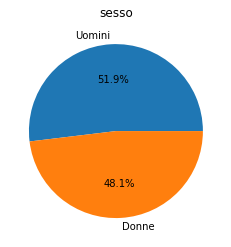

In [20]:
distribuzione_sesso(df)

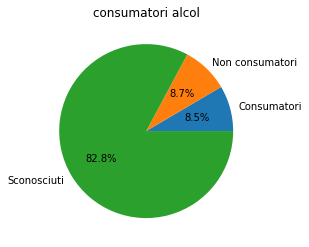

In [21]:
distribuzione_alcol(df)

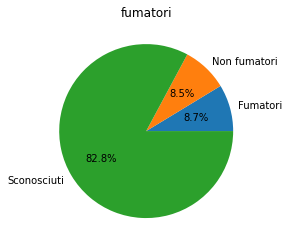

In [22]:
distribuzione_fumatori(df)

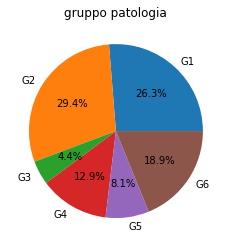

In [23]:
distribuzione_gruppo(df)

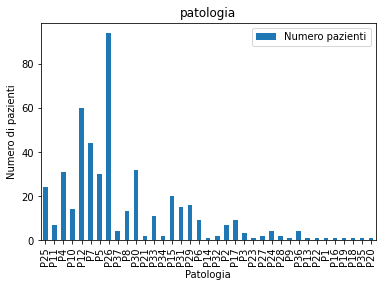

In [24]:
distribuzione_patologia(df)

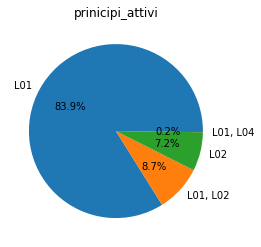

In [25]:
distribuzione_principi_attivi(df)

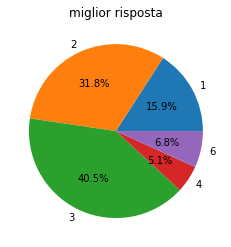

In [26]:
distribuzione_best_response(df)

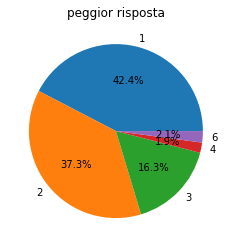

In [27]:
distribuzione_worst_response(df)

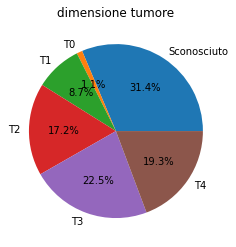

In [28]:
distribuzione_t(df)

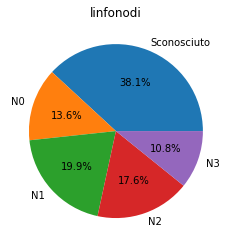

In [29]:
distribuzione_n(df)

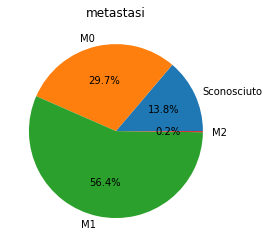

In [30]:
distribuzione_m(df)

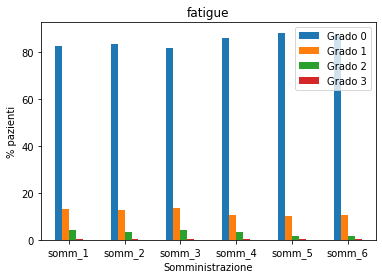

In [31]:
distribuzione_sintomo_perc(df, 'fatigue')

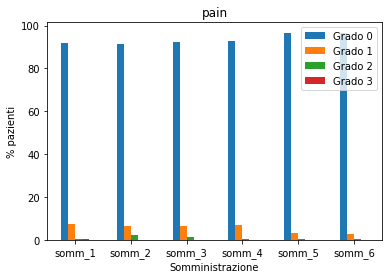

In [32]:
distribuzione_sintomo_perc(df, 'pain')

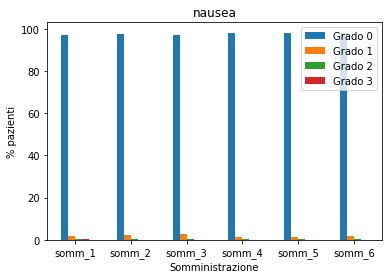

In [33]:
distribuzione_sintomo_perc(df, 'nausea')

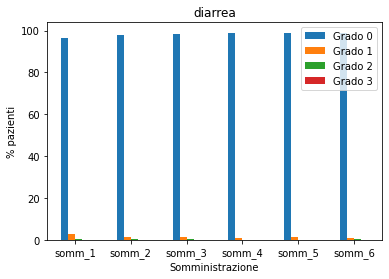

In [34]:
distribuzione_sintomo_perc(df, 'diarrea')

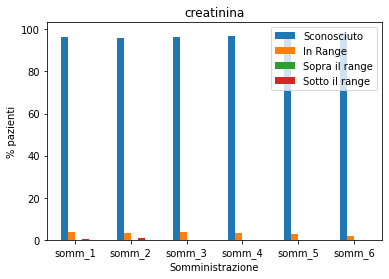

In [35]:
distribuzione_valori(df, 'creatinina')

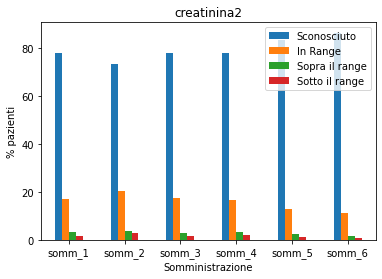

In [36]:
distribuzione_valori(df, 'creatinina2')

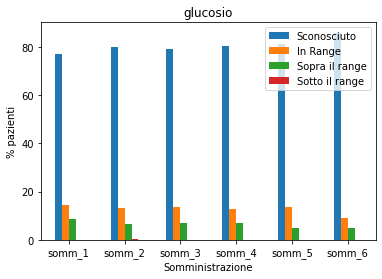

In [37]:
distribuzione_valori(df, 'glucosio')

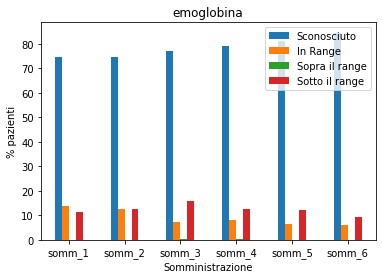

In [38]:
distribuzione_valori(df, 'emoglobina')

***
### Esportazione del nuovo dataset analizzato

In [39]:
def esporta_dati(data, path):
    """Funzione per il salvataggio del dataset in un file csv.
       - data: dataset (DataFrame)
       - path: percorso in cui salvare i dati""" 
    data.to_csv(path)

In [40]:
esporta_dati(df, '/Users/eliaceccolini/Documents/Uni/Tesi/Dataset_finale/Datasets/Dataset_analizzato_multiclasse.csv')

### Trasformazione e esportazione del dataset analizzato per un problema di classificazione binario

In [41]:
def trasforma_binario(data):
    """Funzione per trasformare il problema da multiclasse a binario.
       - data: dataset (DataFrame)"""
    data['best_response'] = [0 if p < 3 else 1 for p in data['best_response']]

In [42]:
trasforma_binario(df)
df['best_response'].value_counts()

1    247
0    225
Name: best_response, dtype: int64

In [43]:
esporta_dati(df, '/Users/eliaceccolini/Documents/Uni/Tesi/Dataset_finale/Datasets/Dataset_analizzato_binario.csv')